## 타겟 넘버
* URL: https://programmers.co.kr/learn/courses/30/lessons/43165
* Level: 2


In [ ]:
def solution(numbers, target):
    def dfs(curr_idx, curr_sum, target, numbers):
        if curr_idx == len(numbers):
            if curr_sum == target:
                return 1
            else:
                return 0
        else:
            nxt_idx = curr_idx + 1
            return dfs(nxt_idx, curr_sum + numbers[curr_idx], target, numbers) + dfs(nxt_idx, curr_sum - numbers[curr_idx], target, numbers)
    
    answer = dfs(0, 0, target, numbers)
    
    
    return answer

## 네트워크
* URL: https://programmers.co.kr/learn/courses/30/lessons/43162
* Level: 3

In [ ]:
def solution(n, computers):
    def dfs(visited, computers, start):
        if start in visited:
            return 0, visited
        visited.add(start)
        for v, adj in enumerate(computers[start]):
            if (start == v) or not adj:
                continue
            if (not v in visited):
                dfs(visited, computers, v)
        return 1, visited
        
    visited = set()
    answer = 0
    
    for start in range(n):
        net, visited = dfs(visited, computers, start)
        answer += net
    
    return answer

## 단어변환
* URL: https://programmers.co.kr/learn/courses/30/lessons/43163
* Level: 3
* 참고:
 * 첫번째 방법: Back-tracking 을 사용하자! 다만, 사용할 때 visited 와 같이 검색한 노드에 대한 체크 정도는 할 수 있어야 함.
 * 두번째 방법: 최소 거리를 구하는 문제이므로, dequeue 를 활용
 * Python 은 call-by-reference 이므로 list를 적극 활용
 * 테스트 코드 예제: 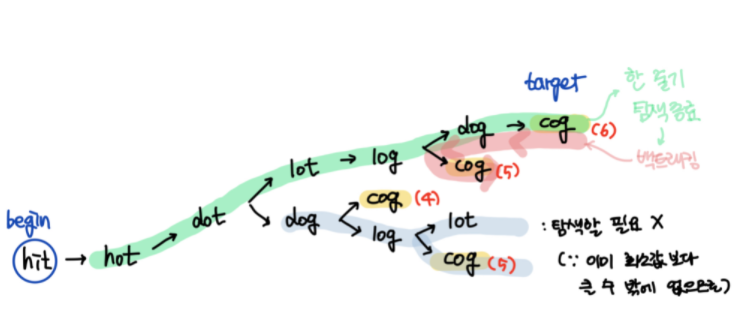

In [6]:
# 첫번째 방법: back-tracking을 활용 (나의 풀이)

def is_adj(q,k):
    diff = 0
    for q_i, k_i in zip(q,k):
        if q_i != k_i:
            diff += 1
    return (diff == 1)

def solution(begin, target, words):
    answer = [len(words)]
    
    if not (target in words):
        return 0
    
    visited = [False] * len(words)
    def backtrack(curr, depth, answer, visited):
        if depth > answer[0]:
            return
        
        for idx, nxt in enumerate(words):
            if is_adj(curr, nxt) and (visited[idx] == False):
                if nxt == target:
                    if depth < answer[0]:
                        answer[0] = depth + 1
                        return
                    else:
                        return
                else:
                    visited[idx] = True
                    backtrack(nxt, depth+1, answer, visited)
                    visited[idx] = False
                
    backtrack(begin, 0, answer, visited)
    return answer[0]

In [9]:
print(solution("hit", "cog", ["hot", "dot", "dog", "lot", "log", "cog"]))
print(solution("hit", "cog", ["hot", "dot", "dog", "lot", "log"]))

4

In [ ]:
# 두번째 방법: BFS 활용 (BoB)

from collections import deque


def get_adjacent(current, words):
    for word in words:
        if len(current) != len(word):
            continue

        count = 0
        for c, w in zip(current, word):
            if c != w:
                count += 1

        if count == 1:
            yield word


def solution(begin, target, words):
    dist = {begin: 0}
    queue = deque([begin])

    while queue:
        current = queue.popleft()

        for next_word in get_adjacent(current, words):
            if next_word not in dist:
                dist[next_word] = dist[current] + 1
                queue.append(next_word)

    return dist.get(target, 0)